# Analysis World happiness vs Total population & Population Density in 2019
## Aim
Statistically prove of there is a correlation bewteen the level of happiness a country expiriences and the total population as well as the population density in the year 2019.
### Hypothesis 
Hypothesis no. 1: There is a relationship bewteen the level of happiness a country expiriences and the total population a country has in the year 2019.
Null hypothesis no. 1: There is no relationship bewteen the level of happiness a country expiriences and the total population a country has in the year 2019.
<br>
Hypothesis no. 2: There is a relationship bewteen the level of happiness a country expiriences and the total population density a country has in the year 2019.
Null hypothesis no.2: There is no relationship bewteen the level of happiness a country expiriences and the total population density a country has in the year 2019.
<br>
### Meaning of variables 
1. rank: This variable was created to show case the positon of a country based on the ladder score. The higher the ladder score the better ranking a country got. As an example, Finland was the country that had the highest ladder score so it was ranked number 1 in the ranking scale, showcasing that it was the country with the highest happiness reported in the data set for the year 2019. 
2. ladder_score: Cantril Ladder is a measure of life satisfaction.
3. gdp_per_capita: The gross domestic product is the monetary value of all finished goods and services made within a country during a specific period
4.  social_support : The extent to which Social support contributed to the calculation of the Happiness Score.
5. healthy_life_expectancy: The extent to which healthy life expectancy contributed to the calculation of the Happiness Score
6. freedom_life_choices: The extent to which Freedom contributed to the calculation of the Happiness Score.
7. generosity: The extent to which Generosity contributed to the calculation of the Happiness Score.
8. perception_corruption: The extent to which Perception of Corruption contributes to Happiness Score.
9. ladder_score_dystopia: Dystopia is an imaginary country that has the world’s least-happy people.


### Tests being conducted
1. Pearsons Correlation test bewteen total population variable and the following variables:
 'ladder_score',
 'gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_life_choices',
 'generosity',
 'perception_corruption',
 'ladder_score_dystopia'
 
2. Pearsons Correlation test bewteen total population density variable and the following variables:
 'ladder_score',
 'gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_life_choices',
 'generosity',
 'perception_corruption',
 'ladder_score_dystopia'
 
 
 

In [1]:
#Importing dependencies
import pandas as pd
from sqlalchemy import create_engine
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import pingouin as pg
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import scipy.stats  as stats

C:\Users\danie\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Extracting Loading and Transforming (ETL) 
## Extracting Data 
Gathering the files from other sources
## Loading
Reading in the files 
### Transforming 
Filtering the data for future processing.

## LOADING DATA

In [2]:
#Reading csvs
#population file
population_file = "../../resources/data/WPP2019_TotalPopulationBySex.csv"
population_df = pd.read_csv(population_file)
#happiness file 
happiness_file = "../../resources/data/world-happiness-report-2021.csv"
happiness_df = pd.read_csv(happiness_file)

## Transforming the data

In [3]:
#Transforming the data sets for analisis 

# Create a filtered dataframe from specific columns
world_happiness_col = ["Country name", "Ladder score","Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", 'Perceptions of corruption']
#Creating df with desiered columns
world_happiness_transformed= happiness_df[world_happiness_col].copy()

#Renaming columns
world_happiness_transformed = world_happiness_transformed.rename(columns={"Country name": "country_name",
                                                          "Ladder score": "ladder_score", "Logged GDP per capita" : "gdp_per_capita", "Social support": "social_support", "Healthy life expectancy" : "healthy_life_expectancy", "Freedom to make life choices":"freedom_life_choices", "Generosity":"generosity","Perceptions of corruption":"perception_corruption"})
#Transforming data dropping duplicates
world_happiness_transformed.drop_duplicates("country_name", inplace=True)

world_happiness_transformed.head()


,country_name,ladder_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [4]:
#Displaying total lenght of countries in world happiness df
len_=len(world_happiness_transformed)
print(f"The total countries in this data set is = {len_}")

The total countries in this data set is = 149


In [5]:
#Getting the list of countries in the data set
names = world_happiness_transformed.country_name
country_names = []
for i in names:
    country_names.append(i)
    

In [6]:
population_df

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


In [7]:
#STEP 4.3
# Create a filtered dataframe from specific columns
population_col= ["Location", "Time","PopTotal", "PopDensity"]
population_transformed= population_df[population_col].copy()

# Rename the column headers
population_transformed = population_transformed.rename(columns={"Location": "country_name",
                                                          "Time": "Year",
                                                          "PopTotal":"total_population",
                                                          "PopDensity" : "population_density"
                                                               })




In [8]:
#Filterning the population data by year specifically year 2019
population_2019 = population_transformed.Year == 2019
#Getting the dataframe for only 2019 population results
population_2019_df = population_transformed[population_2019]


In [9]:
#Filtering the data of populaiton df to match the country names in the world_happienss_df
#Drop additional columns such as index and year
pop_df = population_2019_df.loc[population_2019_df['country_name'].isin(country_names)]
reset_index_pop_df = pop_df.reset_index()
almost_pop_df = reset_index_pop_df.drop(columns=['index','Year'])


In [10]:
#We set the ID as an index
almost_pop_df.index.name='id'
final_pop_df = almost_pop_df
#display final df
final_pop_df.head()

,country_name,total_population,population_density
id,,,
0,Afghanistan,38041.757,58.269
1,Albania,2880.913,105.143
2,Algeria,43053.054,18.076
3,Argentina,44780.675,16.363
4,Armenia,2957.728,103.889


In [11]:
#checking the lenght of data set to see if they match
pop_len = len(final_pop_df)
hap_len = len(world_happiness_transformed)
print(f"The lenght of the Population data frame is {pop_len}")
print(f"The lenght of the World Happiness df data frame is {hap_len}")

The lenght of the Population data frame is 130
The lenght of the World Happiness df data frame is 149


In [12]:
#Getting list of country_names in population df
pop_names = final_pop_df.country_name
pop_country_names = []
for i in pop_names:
    pop_country_names.append(i)
    

In [13]:
#Filtering the data of world happiness df to match the country names in the final_pop_df
happiness_df = world_happiness_transformed.loc[world_happiness_transformed['country_name'].isin(pop_country_names)]

#Sorting values by country name, reseting the index of the country to match the other database and dropping extra column after reset index
sort_happiness_df = happiness_df.sort_values('country_name')
reset_happiness_df = sort_happiness_df.reset_index()
almost_happiness_df = reset_happiness_df.drop(columns='index')


In [14]:
almost_happiness_df.index.name='id'
almost_happiness_df

,country_name,ladder_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
id,,,,,,,,
0,Afghanistan,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
1,Albania,5.117,9.520,0.697,68.999,0.785,-0.030,0.901
2,Algeria,4.887,9.342,0.802,66.005,0.480,-0.067,0.752
3,Argentina,5.929,9.962,0.898,69.000,0.828,-0.182,0.834
4,Armenia,5.283,9.487,0.799,67.055,0.825,-0.168,0.629
...,...,...,...,...,...,...,...,...
125,Uruguay,6.431,9.966,0.925,69.100,0.896,-0.092,0.590
126,Uzbekistan,6.179,8.836,0.918,65.255,0.970,0.311,0.515
127,Yemen,3.658,7.578,0.832,57.122,0.602,-0.147,0.800


In [15]:
final_happiness_df = almost_happiness_df
#checking new length of happines data frame to see if it matches the pop data frame 
len_1 = len(final_happiness_df)
len_2 = len(final_pop_df)
print(f"The length of Happieness data set is = {len_1}")
print(f"The length of Population data set is = {len_2}")
#The lenghts match now!

The length of Happieness data set is = 130
The length of Population data set is = 130


In [16]:
df =  final_happiness_df.sort_values(by='ladder_score', ascending=False)
df.head()

,country_name,ladder_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
id,,,,,,,,
37,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
30,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
114,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
50,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
87,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [17]:
#Creating list of ranks with a for loop and pd.series 
rank = pd.Series(range(1,131))
li_rank = []
for i in rank:
    if i <= 130:
        li_rank.append(i)
        
df['rank'] = li_rank

In [18]:
#Sorting again by country name and dopping extra column that was the original value for overall score 
df_1 = df.sort_values(by='country_name')
col= ['country_name', 'rank',
 'ladder_score',
 'gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_life_choices',
 'generosity',
 'perception_corruption']
df_final_happiness= df_1[col]
df_final_happiness.head()


,country_name,rank,ladder_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
id,,,,,,,,,
0,Afghanistan,130,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
1,Albania,80,5.117,9.520,0.697,68.999,0.785,-0.030,0.901
2,Algeria,94,4.887,9.342,0.802,66.005,0.480,-0.067,0.752
3,Argentina,53,5.929,9.962,0.898,69.000,0.828,-0.182,0.834
4,Armenia,73,5.283,9.487,0.799,67.055,0.825,-0.168,0.629


In [19]:
#Extracting the rank column for statistical analysis. 
happiness_vs_population_df = pd.merge(df_final_happiness, final_pop_df)
col_list = ['country_name', 
            'ladder_score',
             'total_population',
            'population_density',
            'gdp_per_capita',
            'social_support',
            'healthy_life_expectancy',
            'freedom_life_choices',
            'generosity',
            'perception_corruption']
happy_vs_pop_df = happiness_vs_population_df[col_list]
happy_vs_pop_df.head()

,country_name,ladder_score,total_population,population_density,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
0,Afghanistan,2.523,38041.757,58.269,7.695,0.463,52.493,0.382,-0.102,0.924
1,Albania,5.117,2880.913,105.143,9.520,0.697,68.999,0.785,-0.030,0.901
2,Algeria,4.887,43053.054,18.076,9.342,0.802,66.005,0.480,-0.067,0.752
3,Argentina,5.929,44780.675,16.363,9.962,0.898,69.000,0.828,-0.182,0.834
4,Armenia,5.283,2957.728,103.889,9.487,0.799,67.055,0.825,-0.168,0.629


## DATA ANALYSIS 

In [20]:
#Creating the correlation table 
df_corr = happy_vs_pop_df.corr()
df_corr

,ladder_score,total_population,population_density,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
ladder_score,1.000000,-0.120581,0.073901,0.801002,0.769092,0.802974,0.629403,-0.012681,-0.474224
total_population,-0.120581,1.000000,0.003790,-0.041122,-0.133032,-0.023673,0.105657,0.029420,0.052078
population_density,0.073901,0.003790,1.000000,0.168782,0.059805,0.192381,0.144121,0.050020,-0.300176
gdp_per_capita,0.801002,-0.041122,0.168782,1.000000,0.796698,0.875015,0.481545,-0.217099,-0.355012
social_support,0.769092,-0.133032,0.059805,0.796698,1.000000,0.738133,0.507475,-0.093005,-0.233775
healthy_life_expectancy,0.802974,-0.023673,0.192381,0.875015,0.738133,1.000000,0.514097,-0.184909,-0.383231
freedom_life_choices,0.629403,0.105657,0.144121,0.481545,0.507475,0.514097,1.000000,0.161594,-0.444440
generosity,-0.012681,0.029420,0.050020,-0.217099,-0.093005,-0.184909,0.161594,1.000000,-0.147913
perception_corruption,-0.474224,0.052078,-0.300176,-0.355012,-0.233775,-0.383231,-0.444440,-0.147913,1.000000


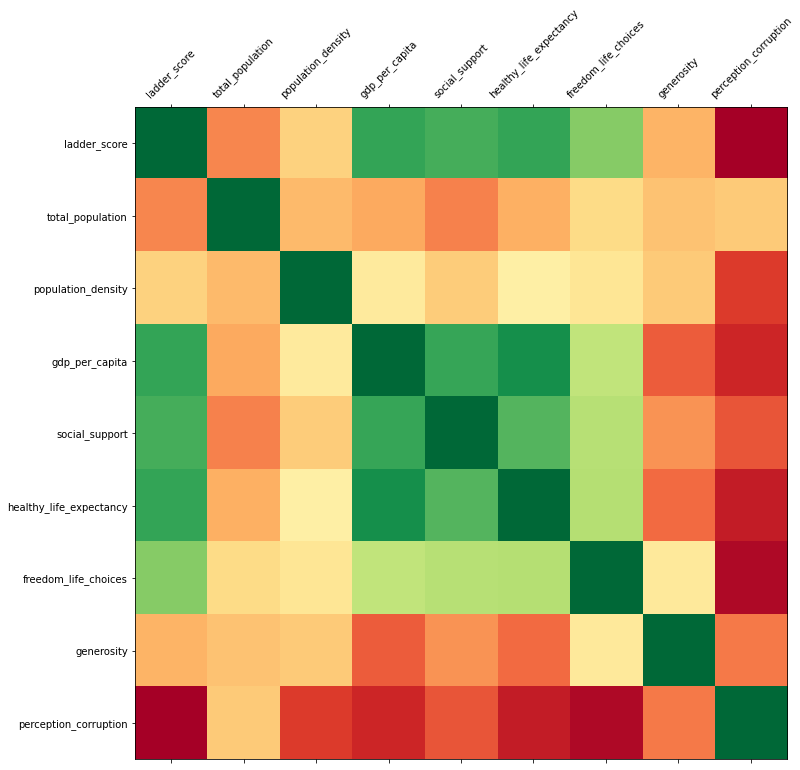

In [21]:
#creating figure for correlation 

labels = [c for c in df_corr.columns]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(df_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation=45)

plt.savefig("../../Images/correlation_matrix.png", facecolor = "w", bbox_inches= "tight" )
plt.show()

In [22]:
happy_vs_pop_df

,country_name,ladder_score,total_population,population_density,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perception_corruption
0,Afghanistan,2.523,38041.757,58.269,7.695,0.463,52.493,0.382,-0.102,0.924
1,Albania,5.117,2880.913,105.143,9.520,0.697,68.999,0.785,-0.030,0.901
2,Algeria,4.887,43053.054,18.076,9.342,0.802,66.005,0.480,-0.067,0.752
3,Argentina,5.929,44780.675,16.363,9.962,0.898,69.000,0.828,-0.182,0.834
4,Armenia,5.283,2957.728,103.889,9.487,0.799,67.055,0.825,-0.168,0.629
...,...,...,...,...,...,...,...,...,...,...
125,Uruguay,6.431,3461.731,19.779,9.966,0.925,69.100,0.896,-0.092,0.590
126,Uzbekistan,6.179,32981.715,77.531,8.836,0.918,65.255,0.970,0.311,0.515
127,Yemen,3.658,29161.922,55.234,7.578,0.832,57.122,0.602,-0.147,0.800
128,Zambia,4.073,17861.034,24.026,8.145,0.708,55.809,0.782,0.061,0.823


In [23]:
# Extracting p- value of each varibale against both total population and total population density
# first we will do the total population variable
tp_pd = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['population_density'])
tp_ls = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['ladder_score'])
tp_gdp = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['gdp_per_capita'])
tp_ss = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['social_support'])
tp_hle = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['healthy_life_expectancy']) 
tp_flc = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['freedom_life_choices'])
tp_g =stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['generosity'])
tp_pc = stats.pearsonr(happy_vs_pop_df['total_population'], happy_vs_pop_df['perception_corruption'])


# Second we do the same but for the population density = stats.pearsonr(happy_vs_pop_df['population'], happy_vs_pop_df['population_density'])
pd_tp = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['total_population'])
pd_ls = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['ladder_score'])
pd_gdp = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['gdp_per_capita'])
pd_ss = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['social_support'])
pd_hle = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['healthy_life_expectancy']) 
pd_flc = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['freedom_life_choices'])
pd_g =stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['generosity'])
pd_pc = stats.pearsonr(happy_vs_pop_df['population_density'], happy_vs_pop_df['perception_corruption'])


#Creating df to show case values 
compiled_df = pd.DataFrame({'total_population':[tp_pd, tp_ls, tp_gdp, tp_ss , tp_hle, tp_flc, tp_g, tp_pc],
                           'population_density':[pd_tp, pd_ls, pd_gdp, pd_ss, pd_hle, pd_flc, pd_g, pd_pc]})



In [24]:
statistical_df = compiled_df.transpose()
s_df = statistical_df.rename(columns={0:'population variables', 1:'ladder_score', 2:'gdp_per_capita', 3: 'social_support', 4:'healthy_life_expectancy', 5: 'freedom_life_choices', 6:'generosity', 7:'perception_corruption'})
stat_df = s_df.transpose()
stat_df.reset_index(inplace=True)
stat_df.rename(columns={'index': 'Variables correlation and P-vlaue'}, inplace=True)
stat_df

,Variables correlation and P-vlaue,total_population,population_density
0,population variables,"(0.003789855466274122, 0.965865897119956)","(0.003789855466274122, 0.965865897119956)"
1,ladder_score,"(-0.1205811155163253, 0.17176653713374399)","(0.07390106888297743, 0.4033759045362161)"
2,gdp_per_capita,"(-0.041121649640564674, 0.6422700855786273)","(0.16878232875156365, 0.05490543369837974)"
3,social_support,"(-0.13303238542556747, 0.13133254097550903)","(0.05980499796250633, 0.4991031908161646)"
4,healthy_life_expectancy,"(-0.023672696649083814, 0.7892067046366947)","(0.19238076046160107, 0.028320416071624766)"
5,freedom_life_choices,"(0.10565702581197413, 0.23154344229455162)","(0.14412135356827135, 0.10185675336984458)"
6,generosity,"(0.029419719453992257, 0.7396864158233488)","(0.05002021593868805, 0.5719622655894484)"
7,perception_corruption,"(0.05207775356563472, 0.5562353544868631)","(-0.300175869880508, 0.0005207472825688342)"


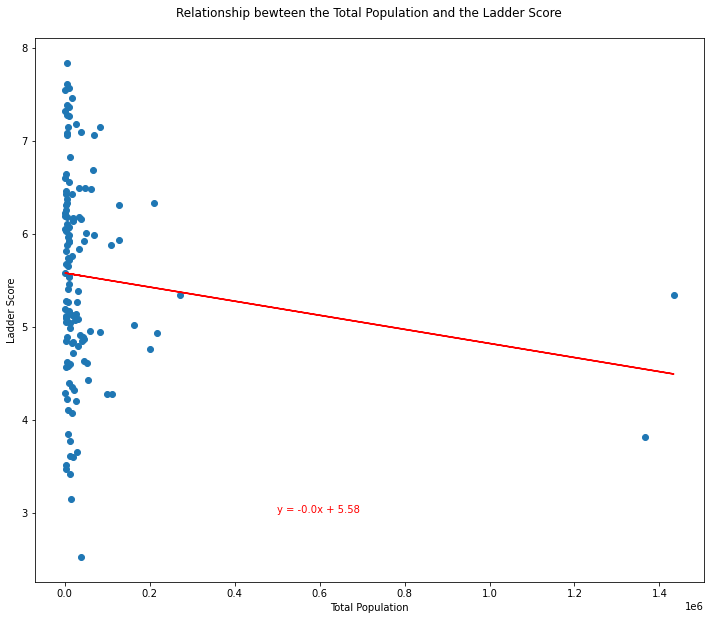

In [25]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#plot regression line for total population 

x_axis = happy_vs_pop_df['total_population']
y_axis = happy_vs_pop_df['ladder_score']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(500000, 3),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the Total Population and the Ladder Score\n")
plt.ylabel("Ladder Score")
plt.xlabel("Total Population")

#save image
plt.savefig("../../Images/ladder_score&Total_population.png", facecolor = "w", bbox_inches= "tight" )

plt.show();

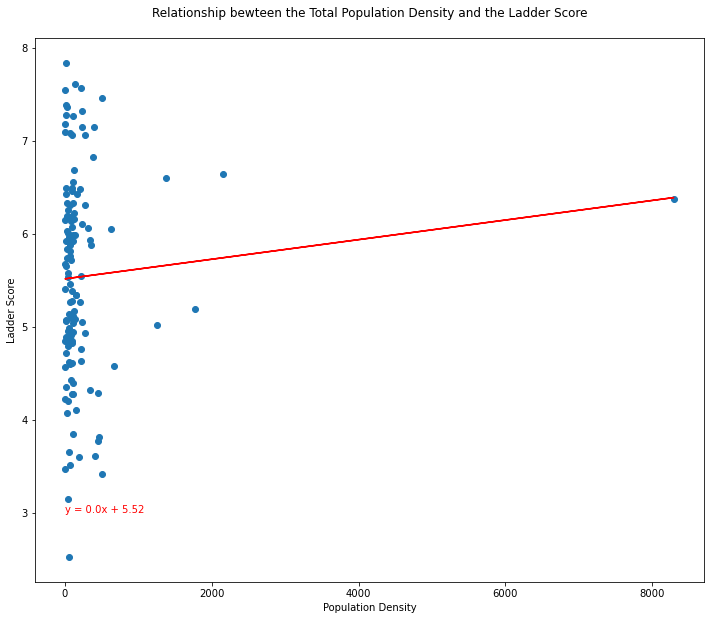

In [26]:
x_axis = happy_vs_pop_df['population_density']
y_axis = happy_vs_pop_df['ladder_score']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(5, 3),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the Total Population Density and the Ladder Score\n")
plt.ylabel("Ladder Score")
plt.xlabel("Population Density")

#save image
plt.savefig("../../Images/ladder_score&Population_density.png", facecolor = "w", bbox_inches= "tight" )

plt.show();

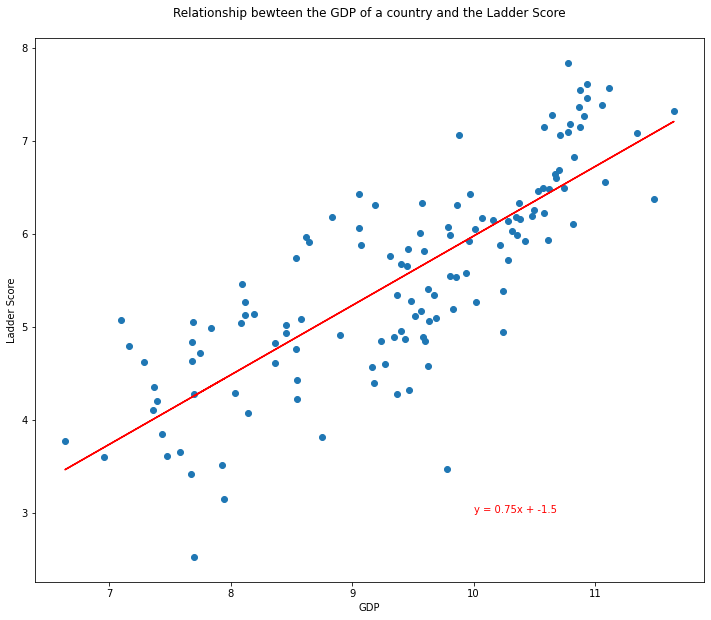

In [27]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#plot regression line for GDP

x_axis = happy_vs_pop_df['gdp_per_capita']
y_axis = happy_vs_pop_df['ladder_score']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(10, 3),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the GDP of a country and the Ladder Score\n")
plt.ylabel("Ladder Score")
plt.xlabel("GDP")

#save image
plt.savefig("../../Images/ladder_score&GDP.png", facecolor = "w", bbox_inches= "tight" )

plt.show();

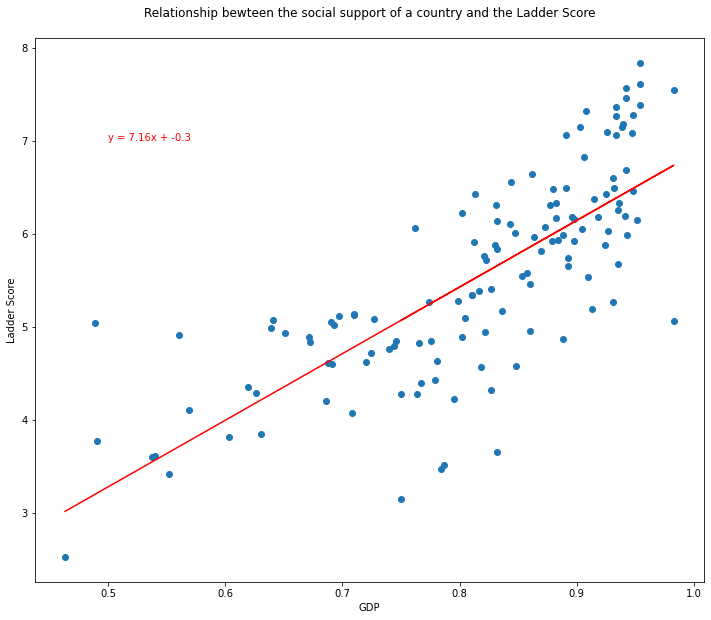

In [28]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#plot regression line for SOCIAL SUPPORT

x_axis = happy_vs_pop_df['social_support']
y_axis = happy_vs_pop_df['ladder_score']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.5, 7),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the social support of a country and the Ladder Score\n")
plt.ylabel("Ladder Score")
plt.xlabel("GDP")

#save image
plt.savefig("../../Images/ladder_score&SS.png", facecolor = "w", bbox_inches= "tight" )

plt.show();

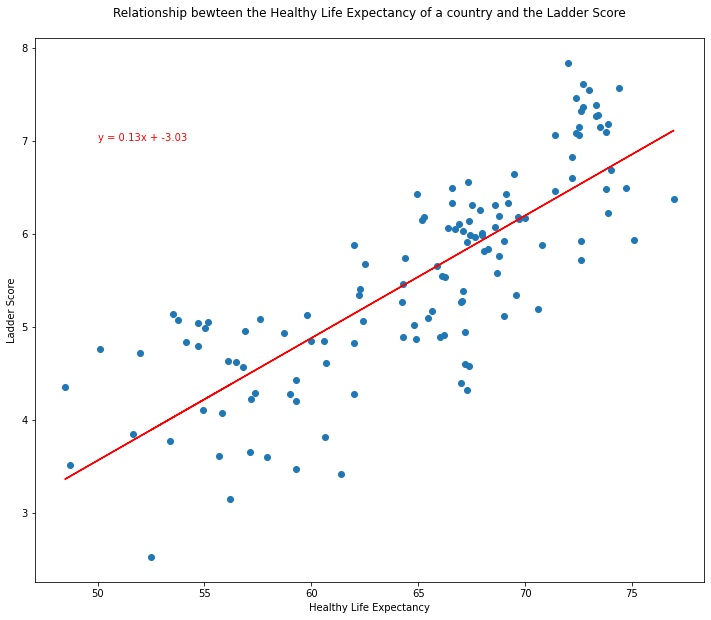

In [29]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#plot regression line for HEALTHY LIFE EXPECTANCY

x_axis = happy_vs_pop_df['healthy_life_expectancy']
y_axis = happy_vs_pop_df['ladder_score']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(50, 7),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the Healthy Life Expectancy of a country and the Ladder Score\n")
plt.ylabel("Ladder Score")
plt.xlabel("Healthy Life Expectancy")

#save image
plt.savefig("../../Images/ladder_score&hle.png", facecolor = "w", bbox_inches= "tight" )

plt.show();

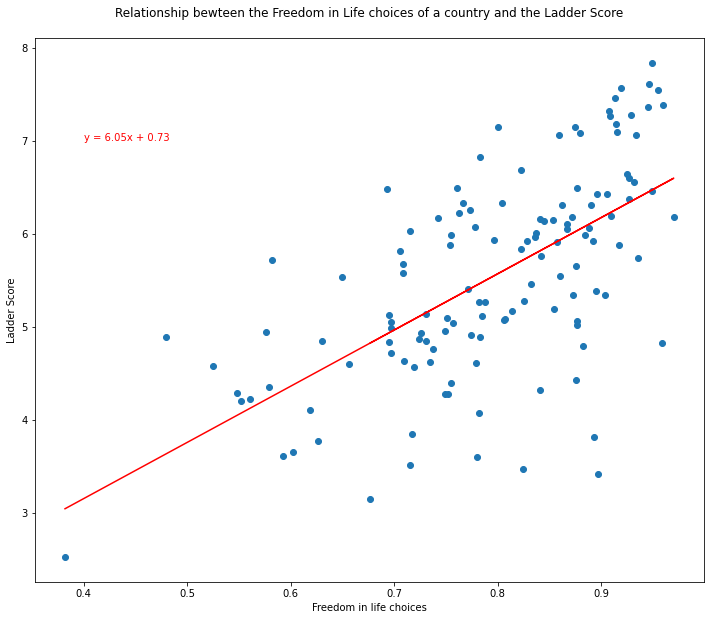

In [30]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
#plot regression line for HEALTHY FREEDO ON DECISIONS

x_axis = happy_vs_pop_df['freedom_life_choices']
y_axis = happy_vs_pop_df['ladder_score']

(slope, intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12,10))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values, color ='r')
plt.annotate(line_eq,(0.4, 7),color ='r')

#Create the lables
plt.title(f"Relationship bewteen the Freedom in Life choices of a country and the Ladder Score\n")
plt.ylabel("Ladder Score")
plt.xlabel("Freedom in life choices")

#save image
plt.savefig("../../Images/ladder_score&FLC.png", facecolor = "w", bbox_inches= "tight" )

plt.show();

# Results & Conclusions 

## Results
1. Correlation value total population = -0.121 
2. P-value total population = 0.172
3. Correlation value population density = 0.074
4. P-value population density = 0.403

We can NOT reject the null hypothesis for both tests that were run. This means that there is no statistical evidence that the population total and the population density have an effect on the happiness level of each country (in the sample) for the year 2019.  
### Additional analysis with the same data set
We can state that there is sufficient statistical analysis to when it comes to the correlation bewteen the ladder score and the following varibale for the year 2019:
1. GDP of a country
2. Social support
3. healthy life expectancy
4. Fredom Life choices.
All of the variables mentioned above have a P-vlaue lower than our alpha (0.5) as shown on there graphs. They also show a strong positive correlation. 

## Conclusions 
Based on the statistical analysis done there is no sufficient statistical evidence to prove that the popualtion total of a country or the population density has a relationship with the level of happiness that the country expiriences. 

With that said, we can state that eventhough there is no statistical evidence the correlationship bewteen total population and population density with the happiness level is different. We can see there is a negative correlation bewteen total population and happiness level, where the correlation level is positive for the population density.

According to the data set we can state that variables such as the GDP, Social support, healthy life expectancy, and, Fredom Life choices have a strong positive correlation with happiness in the year 2019. 